In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

mode = "hard"
percentiles = [50, 25, 12, 6]
checkpoints = ["06000", "03000", "1500", "1500"]


hard_accuracies = []
hard_percent_examples = []
for i in range(len(percentiles)):
    percentile = percentiles[i]
    checkpoint = checkpoints[i]
    accuracy = (np.load(f"ckpts/sft_gsm8k_llama7B_subsample_ckpt10000_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/correct_all.npy")).mean()
    hard_percent_examples.append(percentile)
    hard_accuracies.append(accuracy)

In [3]:
mode = "easy"
percentiles = [50, 75, 87, 93]
checkpoints = ["05000", "02500", "1500", "1000"]

easy_accuracies = []
easy_percent_examples = []
for i in range(len(percentiles)):
    percentile = percentiles[i]
    checkpoint = checkpoints[i]
    accuracy = (np.load(f"ckpts/sft_gsm8k_llama7B_subsample_ckpt10000_{mode}_{str(percentile)}/checkpoint_{checkpoint}/hf_model/correct_all.npy")).mean()
    easy_percent_examples.append(100 - percentile)
    easy_accuracies.append(accuracy)

In [4]:
full_accuracy = (np.load(f"ckpts/sft_gsm8k_llama7B_full3/checkpoint_10000/hf_model/correct_all.npy")).mean()

In [9]:
hard_percentiles = [50, 25, 12, 6]
checkpoints = ["04500", "03500", "02000", "1000"]

easy93_hard_accuracies = []
easy93_hard_percent_examples = []
for i in range(len(hard_percentiles)):
    hard_percentile = hard_percentiles[i]
    checkpoint = checkpoints[i]
    accuracy = (np.load(f"ckpts/sft_gsm8k_llama7B_subsample_easy93_hard{str(hard_percentile)}/checkpoint_{checkpoint}/hf_model/correct_all.npy")).mean()
    easy93_hard_percent_examples.append(7+hard_percentile)
    easy93_hard_accuracies.append(accuracy)

In [10]:
easy93_hard_percent_examples

[57, 32, 19, 13]

In [11]:
hard_percent_examples

[50, 25, 12, 6]

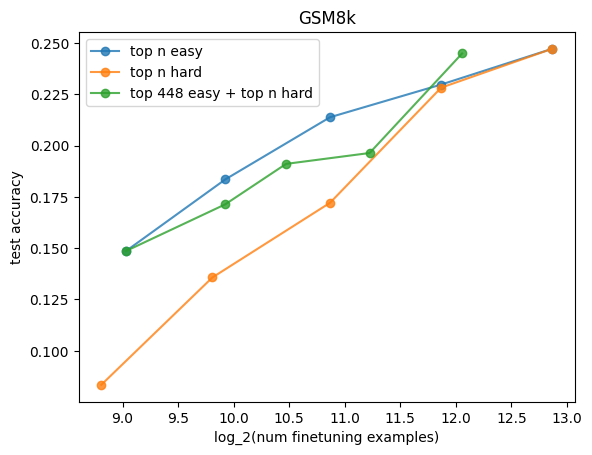

In [12]:
plt.plot(np.log2(np.array([100]+easy_percent_examples)*7473/100), [full_accuracy]+easy_accuracies, "o-",  alpha=0.8, label = "top n easy")
plt.plot(np.log2(np.array([100]+hard_percent_examples)*7473/100), [full_accuracy]+hard_accuracies, "o-",  alpha=0.8, label = "top n hard")

plt.plot(np.log2(np.array(easy93_hard_percent_examples+[7])*7473/100), easy93_hard_accuracies+[easy_accuracies[-1]], "o-",  alpha=0.8, label = "top 448 easy + top n hard")


plt.xlabel("log_2(num finetuning examples)")
plt.ylabel("test accuracy")
plt.title("GSM8k")
plt.legend()

In [9]:
6*7473/100

448.38